# Linear Regression and Training loop

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [3]:
t_c

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])

In [4]:
t_u

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

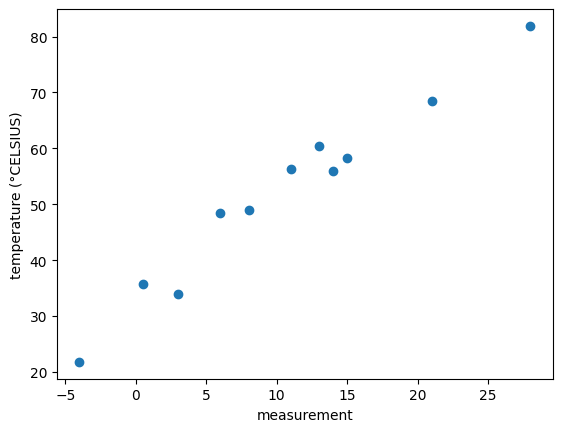

In [5]:
plt.ylabel("temperature (°CELSIUS)")
plt.xlabel("measurement")
plt.scatter(t_c, t_u)
plt.show()

In [6]:
def model(t_u, w, b):
    return t_u * w + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

Initialize parameters and model

In [7]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)

In [8]:
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [9]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [10]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [11]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [12]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        # Forward pass
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        
        # Back prop
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad
        if n_epochs > 1000:
            if epoch % 500 == 0:
                print('Epoch %d, Loss %f' % (epoch, float(loss)))
        else:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

In [13]:
training_loop(n_epochs = 100,
              learning_rate = 1e-4,
              params = torch.tensor([1.0, 0.0]),
              t_u = t_u,
              t_c = t_c)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 323.090515
Epoch 3, Loss 78.929634
Epoch 4, Loss 37.552845
Epoch 5, Loss 30.540283
Epoch 6, Loss 29.351154
Epoch 7, Loss 29.148884
Epoch 8, Loss 29.113848
Epoch 9, Loss 29.107145
Epoch 10, Loss 29.105247
Epoch 11, Loss 29.104168
Epoch 12, Loss 29.103222
Epoch 13, Loss 29.102295
Epoch 14, Loss 29.101379
Epoch 15, Loss 29.100466
Epoch 16, Loss 29.099548
Epoch 17, Loss 29.098631
Epoch 18, Loss 29.097717
Epoch 19, Loss 29.096796
Epoch 20, Loss 29.095881
Epoch 21, Loss 29.094959
Epoch 22, Loss 29.094049
Epoch 23, Loss 29.093134
Epoch 24, Loss 29.092216
Epoch 25, Loss 29.091301
Epoch 26, Loss 29.090385
Epoch 27, Loss 29.089464
Epoch 28, Loss 29.088551
Epoch 29, Loss 29.087635
Epoch 30, Loss 29.086714
Epoch 31, Loss 29.085804
Epoch 32, Loss 29.084888
Epoch 33, Loss 29.083967
Epoch 34, Loss 29.083057
Epoch 35, Loss 29.082142
Epoch 36, Loss 29.081221
Epoch 37, Loss 29.080309
Epoch 38, Loss 29.079390
Epoch 39, Loss 29.078474
Epoch 40, Loss 29.077562
Epoch 

tensor([ 0.2327, -0.0438])

In [14]:
# normalization
t_un = 0.1 * t_u

In [15]:
params = training_loop(n_epochs = 5000,
                       learning_rate = 1e-2,
                       params = torch.tensor([1.0, 0.0]),
                       t_u = t_un,
                       t_c = t_c)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927680
Epoch 4500, Loss 2.927651
Epoch 5000, Loss 2.927648


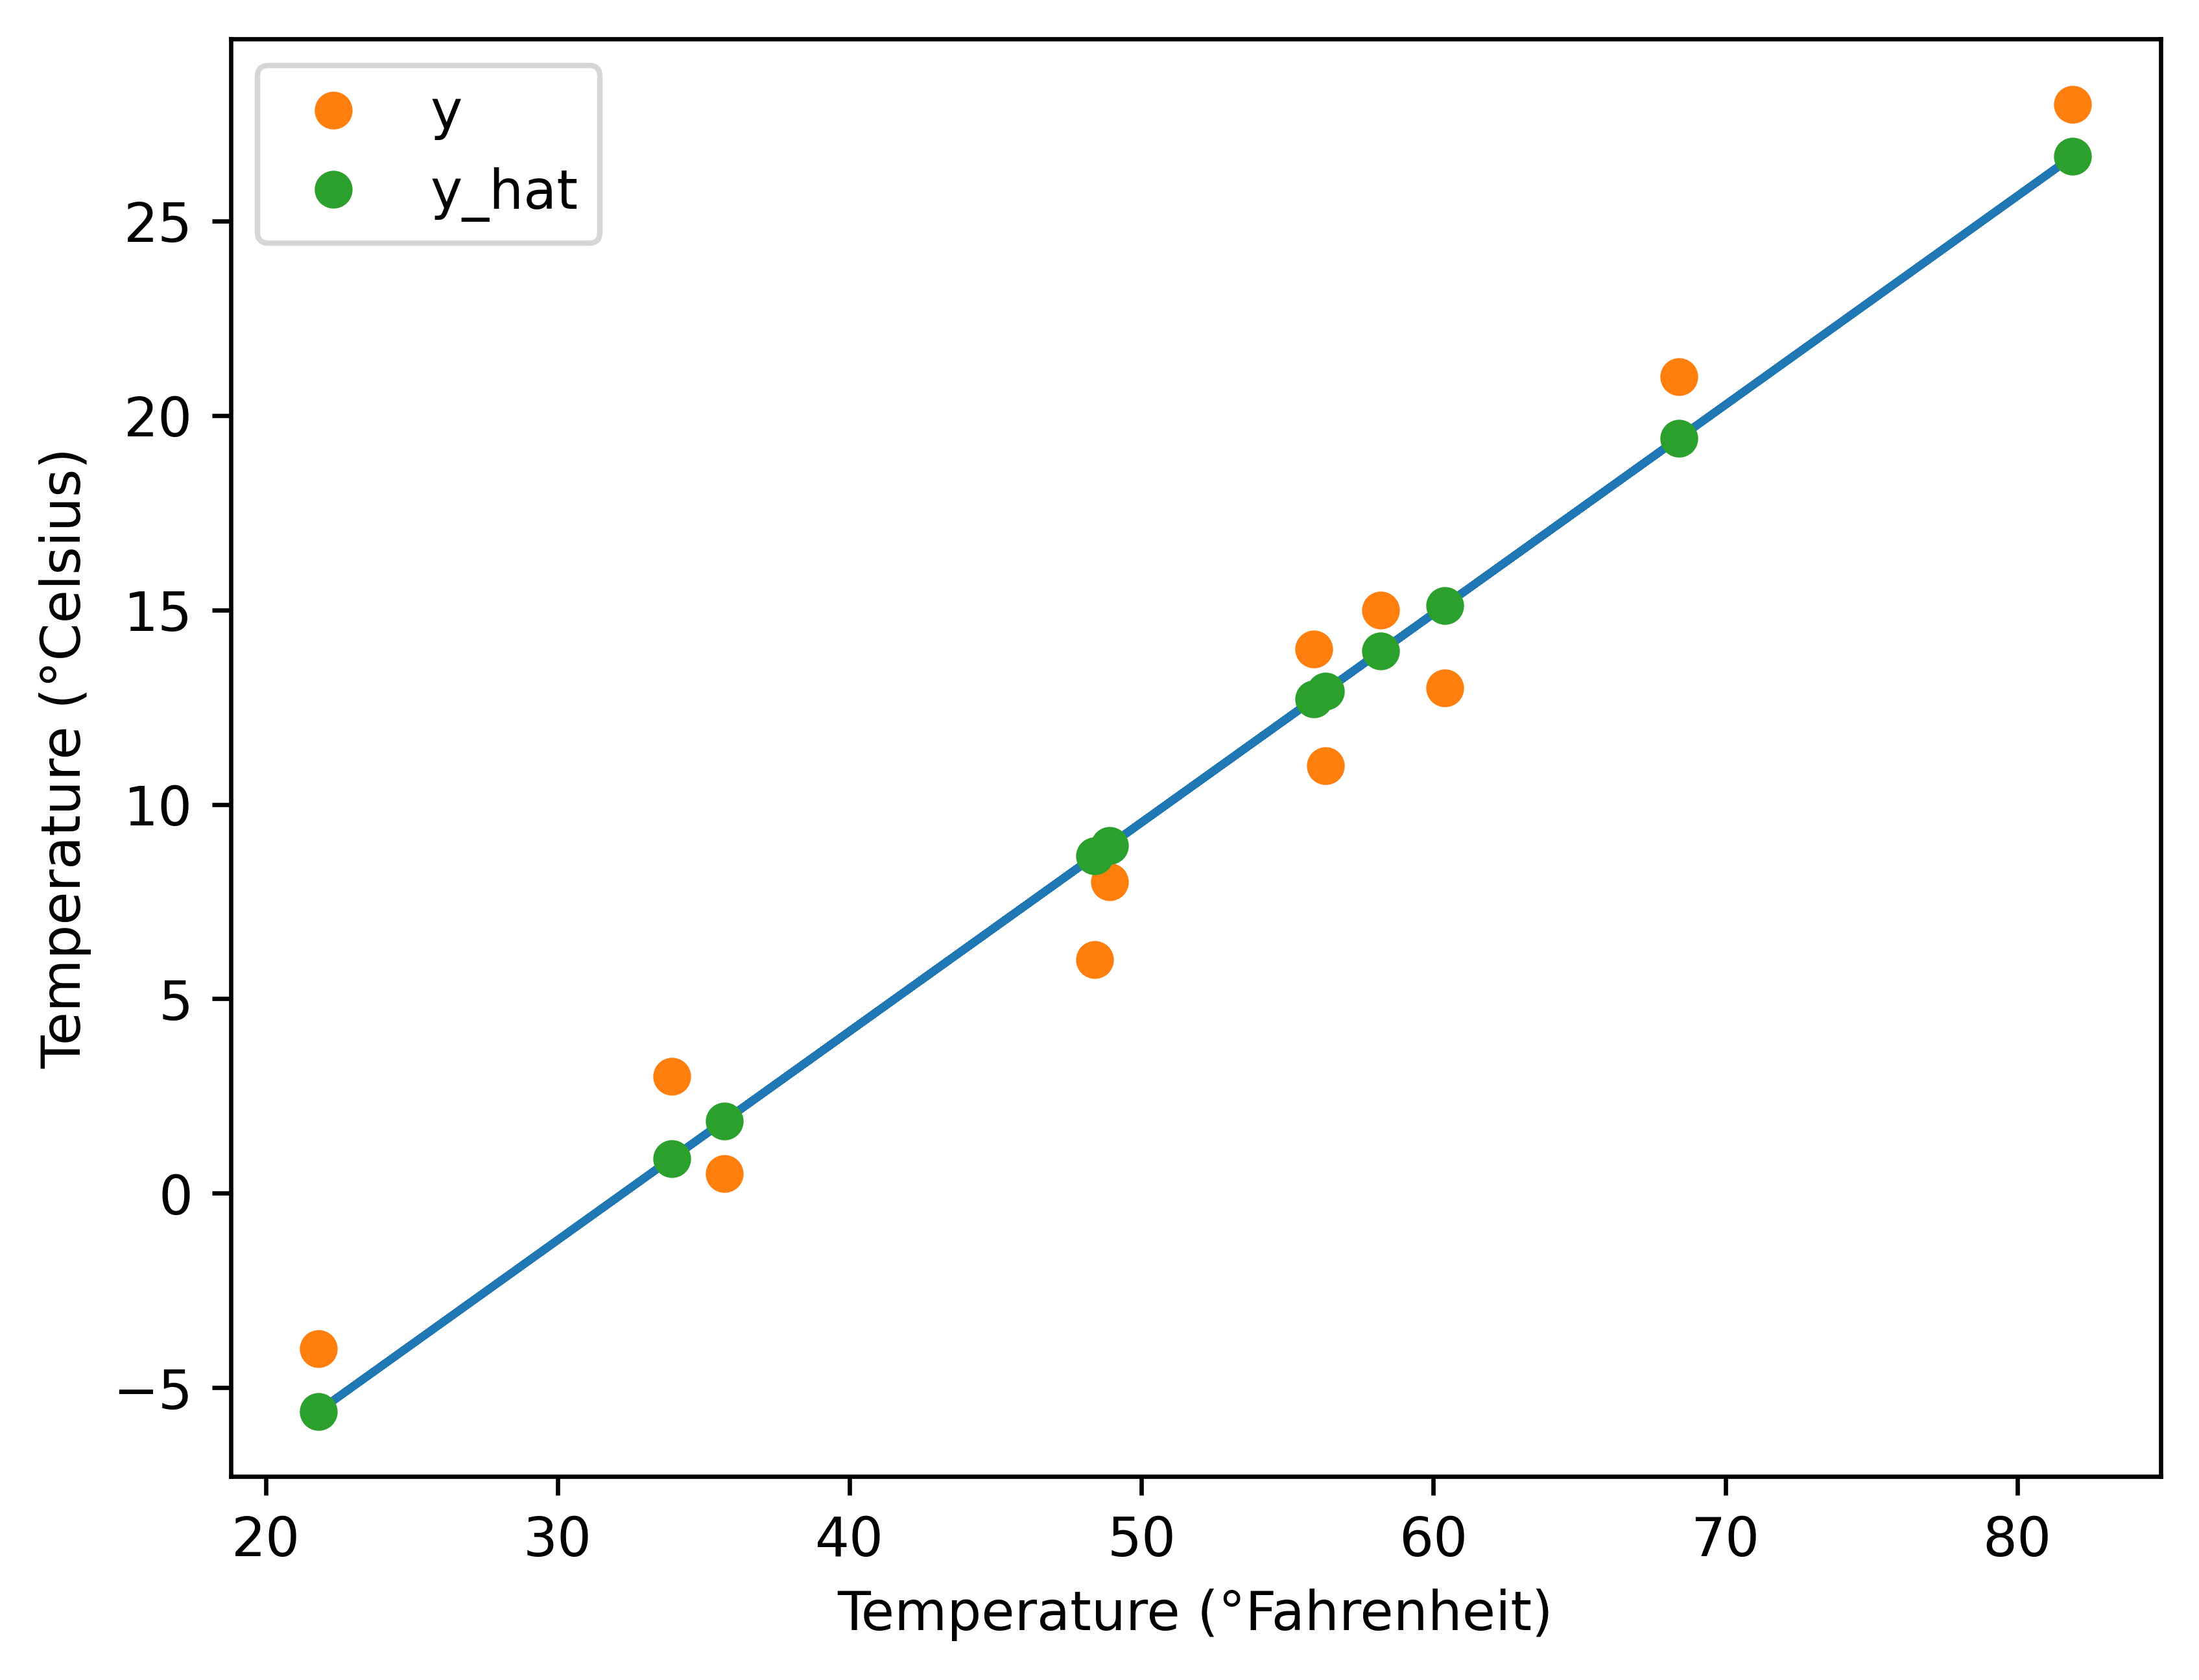

In [16]:
t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label="y")
plt.plot(t_u.numpy(), t_p.numpy(), 'o', label="y_hat")

plt.legend(loc="upper left")
plt.show()

## Using Autograd

In [17]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [18]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

In [19]:
params.grad

tensor([4517.2969,   82.6000])

**Note**: calling backward will lead derivatives to accumulate at leaf nodes.
So if backward was called earlier, the loss is evaluated again, backward is called again
(as in any training loop), and the gradient at each leaf is accumulated (that is,
summed) on top of the one computed at the previous iteration, which leads to an
incorrect value for the gradient.

In order to prevent this from occurring, we need to zero the gradient explicitly at each
iteration. We can do this easily using the in-place zero_ method

In [20]:
if params.grad is not None:
    params.grad.zero_()

In [21]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        
        t_p = model(t_u, *params)
        
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [22]:
training_loop(
            n_epochs = 5000,
            learning_rate = 1e-2,
            params = torch.tensor([1.0, 0.0], requires_grad=True),
            t_u = t_un,
            t_c = t_c)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

## Optimizer

Every optimizer constructor takes a list of parameters (aka PyTorch tensors, typically
with requires_grad set to True) as the first input. All parameters passed to the optimizer
are retained inside the optimizer object so the optimizer can update their values
and access their grad attribute

Each optimizer exposes two methods: zero_grad and step. zero_grad zeroes the
grad attribute of all the parameters passed to the optimizer upon construction. step
updates the value of those parameters according to the optimization strategy implemented
by the specific optimizer.

In [23]:
import torch.optim as optim
#dir(optim)

In [24]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

learning_rate = 1e-5

optimizer = optim.SGD([params], lr=learning_rate)

In [25]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

optimizer.step()

In [26]:
params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

The value of params is updated upon calling step without us having to touch it ourselves!
What happens is that the optimizer looks into params.grad and updates
params, subtracting learning_rate times grad from it

In [27]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

learning_rate = 1e-2

optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)

loss = loss_fn(t_p, t_c)

# Zero gradients
optimizer.zero_grad()

loss.backward()

optimizer.step()
params

tensor([1.7761, 0.1064], requires_grad=True)

In [28]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [29]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
#optimizer = optim.SGD([params], lr=learning_rate)
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
            n_epochs = 5000,
            optimizer = optimizer,
            params = params,
            t_u = t_un,
            t_c = t_c)

Epoch 500, Loss 24.946461
Epoch 1000, Loss 15.752771
Epoch 1500, Loss 9.455151
Epoch 2000, Loss 5.767542
Epoch 2500, Loss 3.932838
Epoch 3000, Loss 3.196811
Epoch 3500, Loss 2.977151
Epoch 4000, Loss 2.933181
Epoch 4500, Loss 2.927968
Epoch 5000, Loss 2.927654


tensor([  5.3660, -17.2952], requires_grad=True)

## Splittting into Training and Validation

In [30]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 6,  9,  8, 10,  2,  1,  7,  0,  5]), tensor([4, 3]))

In [31]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u # Normalizing by multiplying for 0.1
val_t_un = 0.1 * val_t_u

### Training loop with validation loss

Note that there is no val_loss.backward()
here, since we don’t want to train the
model on the validation data.

We only ever call backward on
train_loss. Therefore, errors will only ever backpropagate based on the training
set—the validation set is used to provide an independent evaluation of the accuracy of
the model’s output on data that wasn’t used for training.

<img src="figure5.png" width="700">

In [32]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                train_t_c, val_t_c):

    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)

        optimizer.zero_grad()

        train_loss.backward()
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                    f" Validation loss {val_loss.item():.4f}")
    return params

In [33]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
            n_epochs = 3000,
            optimizer = optimizer,
            params = params,
            train_t_u = train_t_un,
            val_t_u = val_t_un,
            train_t_c = train_t_c,
            val_t_c = val_t_c)

Epoch 1, Training loss 51.4150, Validation loss 210.6365
Epoch 2, Training loss 30.8837, Validation loss 122.4504
Epoch 3, Training loss 26.0599, Validation loss 89.7898
Epoch 500, Training loss 7.6853, Validation loss 20.7935
Epoch 1000, Training loss 3.9516, Validation loss 8.9512
Epoch 1500, Training loss 3.1379, Validation loss 5.4303
Epoch 2000, Training loss 2.9606, Validation loss 4.2241
Epoch 2500, Training loss 2.9219, Validation loss 3.7563
Epoch 3000, Training loss 2.9135, Validation loss 3.5587


tensor([  5.1676, -16.2686], requires_grad=True)

**Since we’re not ever calling backward
on val_loss, why are we building the graph in the first place?**

We could in fact
just call model and loss_fn as plain functions, without tracking the computation.
However optimized, building the autograd graph comes with additional costs that we
could totally forgo during the validation pass, especially when the model has millions
of parameters.

In order to address this, PyTorch allows us to switch off autograd when we don’t
need it, using the torch.no_grad context manager.12 We won’t see any meaningful
advantage in terms of speed or memory consumption on our small problem. However,
for larger models, the differences can add up. We can make sure this works by
checking the value of the requires_grad attribute on the val_loss tensor:

In [34]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):

    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        with torch.no_grad():
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False
            
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

In [36]:
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss